# Visualizing Earnings Based On College Majors
___

For this project, we will be looking at data on the employment outcomes of students who graduated from college between 2010 and 2012. The original dataset was provided by the American Community Survey which conducts surveys and aggregates the data. This was then cleaned by FiveThirtyEight and released it [here](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

#### Goals

Through various data visualization techniques, we will be able to answer both simple and complex questions in ways tables cannot do as elegantly.

Some of the plots we will be using are:
- Line Plots
- Scatter Plots
- Bar Plots and Histograms
- Boxplots

Note that we will be using both `matplotlib` and `pandas` plotting functions.

In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset
recent_grads = pd.read_csv("recent-grads.csv")

In [2]:
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [3]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads.describe(include = "all")

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,LINGUISTICS AND COMPARATIVE LANGUAGE AND LITER...,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [6]:
raw_data_count = len(recent_grads)

recent_grads = recent_grads.dropna()

cleaned_data_count = len(recent_grads)

print("Raw Data Count:", raw_data_count)
print("Cleaned Data Count:", cleaned_data_count)

Raw Data Count: 173
Cleaned Data Count: 172


In [7]:
recent_grads["Major_category"].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Agriculture & Natural Resources         9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

## Correlational Relationships

#### Sample Size (Full-time) vs. Median Salary

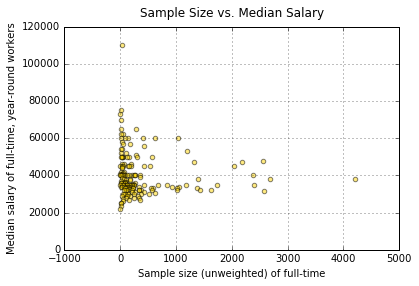

In [8]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', 
                       kind='scatter', color = "gold",
                       grid = True, alpha = 0.5)
ax1.set_title("Sample Size vs. Median Salary", y = 1.02)
ax1.set_xlabel("Sample size (unweighted) of full-time")
ax1.set_ylabel("Median salary of full-time, year-round workers")

#### Sample Size (Full-Time) vs. Unemployment Rate

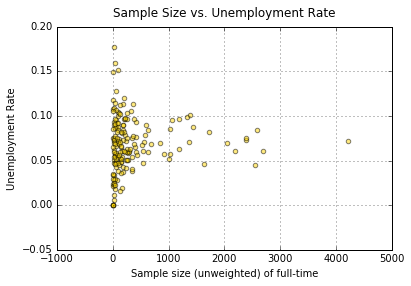

In [9]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', 
                       kind='scatter', color = "gold",
                       grid = True, alpha = 0.5)
ax.set_title("Sample Size vs. Unemployment Rate", y = 1.02)
ax.set_xlabel("Sample size (unweighted) of full-time")
ax.set_ylabel("Unemployment Rate")

#### Employed >= 35 hours vs. Median Salary

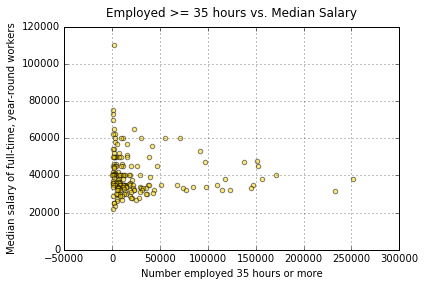

In [10]:
ax = recent_grads.plot(x='Full_time', y='Median', 
                       kind='scatter', color = "gold",
                       grid = True, alpha = 0.5)
ax.set_title("Employed >= 35 hours vs. Median Salary", y = 1.02)
ax.set_xlabel("Number employed 35 hours or more")
ax.set_ylabel("Median salary of full-time, year-round workers")

#### Women's Share vs. Unemployment Rate

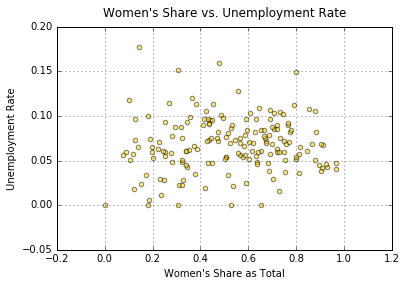

In [11]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', 
                       kind='scatter', color = "gold",
                       grid = True, alpha = 0.5)
ax.set_title("Women's Share vs. Unemployment Rate", y = 1.02)
ax.set_xlabel("Women's Share as Total")
ax.set_ylabel("Unemployment Rate")

#### Male Graduates vs. Median Salary

#### Female Graduates vs. Median Salary

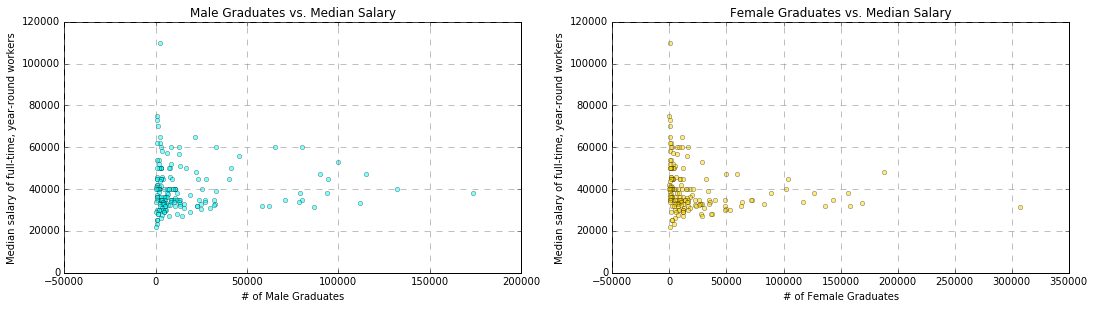

In [12]:
fig = plt.figure(figsize = (18, 4.5))

ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax.scatter(x = recent_grads["Men"], y = recent_grads["Median"], 
           edgecolors = "black", color = "cyan", 
           linewidth = 0.5, alpha = 0.5)
ax.set_title("Male Graduates vs. Median Salary")
ax.set_xlabel("# of Male Graduates")
ax.set_ylabel("Median salary of full-time, year-round workers")
ax.grid(True, color = "gray", ls = "--", linewidth = 0.5)

ax2.scatter(x = recent_grads["Women"], y = recent_grads["Median"],
            edgecolors = "black", color = "gold", 
            linewidth = 0.5, alpha = 0.5)
ax2.set_title("Female Graduates vs. Median Salary")
ax2.set_xlabel("# of Female Graduates")
ax2.set_ylabel("Median salary of full-time, year-round workers")
ax2.grid(True, color = "gray", ls = "--", linewidth = 0.5)

plt.show()

## Distributions

In [235]:
from matplotlib.ticker import FormatStrFormatter

def histog(data, figsize = (4, 3), title = "My Histogram",
           bins = 10, setticks = False,
           getQuartiles = False,
           getPercentages = False,
           withDecimal = False,
           xlabel = "", ylabel = "",
           xlim = 0, ylim = 0, grid = False,
           color = "gold", edgecolor = "black", 
           color25 = "green", color75 = "red",
           alpha = 1, rotation = 0):

    fig, ax = plt.subplots(figsize = figsize)

    counts, bins, patches = ax.hist(data, facecolor = color, 
                                    edgecolor = edgecolor, 
                                    bins = bins, alpha = alpha)

    # Set the ticks to be at the edges of the bins.
    if setticks == True:
        ax.set_xticks(bins)
        ax.set_xticklabels(bins, rotation = rotation)
        if getQuartiles == True or getPercentages == True:
            plt.subplots_adjust(bottom = 0.5)
        

    # Set the xaxis's tick labels to be formatted with 1 decimal place...
    if withDecimal == True:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    # Change the colors of bars at the edges...
    if getQuartiles == True:
        twentyfifth, seventyfifth = np.percentile(data, [25, 75])
        for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
            if rightside < twentyfifth:
                patch.set_facecolor(color25)
            elif leftside > seventyfifth:
                patch.set_facecolor(color75)

    # Label the raw counts and the percentages below the x-axis...
    if getPercentages == True:
        bin_centers = 0.5 * np.diff(bins) + bins[:-1]
        for count, x in zip(counts, bin_centers):

            # Label the raw counts
            ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
                        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

            # Label the percentages
            percent = '%0.0f%%' % (100 * float(count) / counts.sum())
            ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
                        xytext=(0, -32), textcoords='offset points', va='top', ha='center')

        # Give ourselves some more room at the bottom of the plot
        plt.subplots_adjust(bottom=.15)

    ax.set_title(title, y = 1.02)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(grid, alpha = 0.1, axis = "y", ls = "-")

    plt.show()

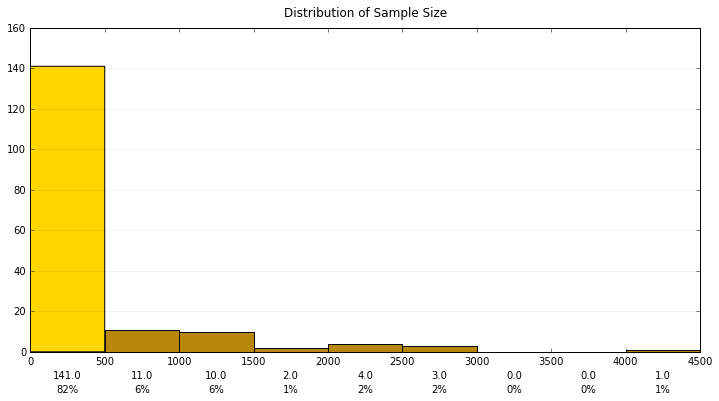

In [384]:
histog(recent_grads["Sample_size"], figsize = (12, 6), 
       bins = np.arange(0, 10*500, 500),  
       color25 = "goldenrod", color75 = "darkgoldenrod",
       getQuartiles = True, getPercentages = True, 
       color = "gold",
       title = "Distribution of Sample Size")

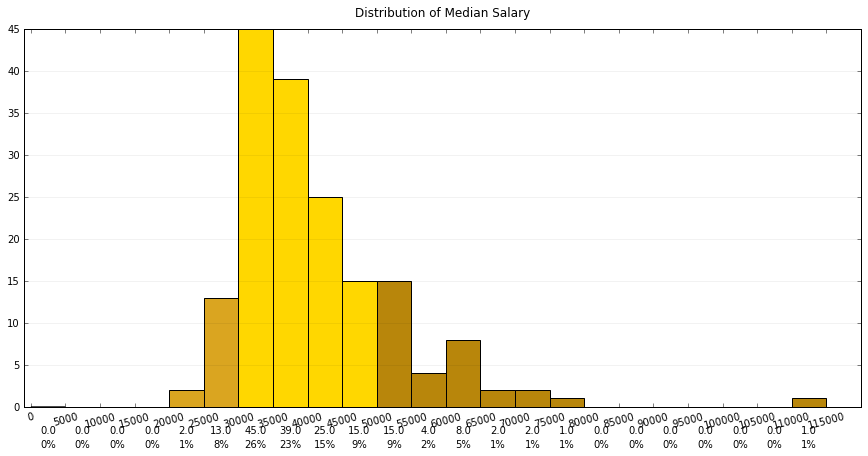

In [382]:
histog(recent_grads["Median"], figsize = (15, 7), 
       bins = np.arange(0, 120000, 5000), getQuartiles = True,
       getPercentages = True, color = "gold", 
       color25 = "goldenrod", color75 = "darkgoldenrod",
       setticks = True,
       rotation = 15, xlim = -1000, title = "Distribution of Median Salary")

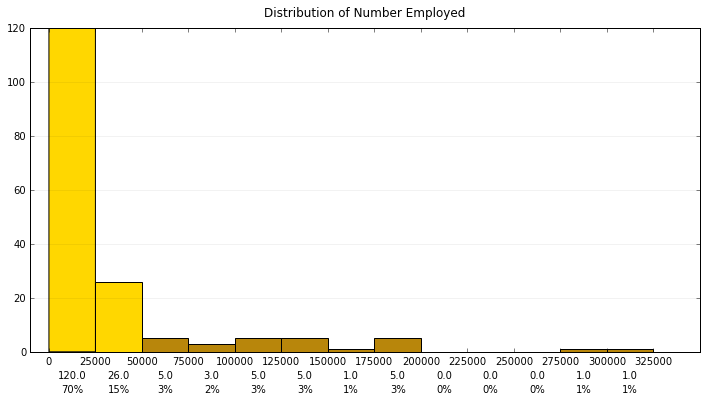

In [385]:
histog(recent_grads["Employed"], figsize = (12, 6), 
       bins = np.arange(0, 350000, 25000), getQuartiles = True,
       getPercentages = True, color = "gold", setticks = True, 
       color25 = "goldenrod", color75 = "darkgoldenrod",
       rotation = 0, xlim = -10000, title = "Distribution of Number Employed")

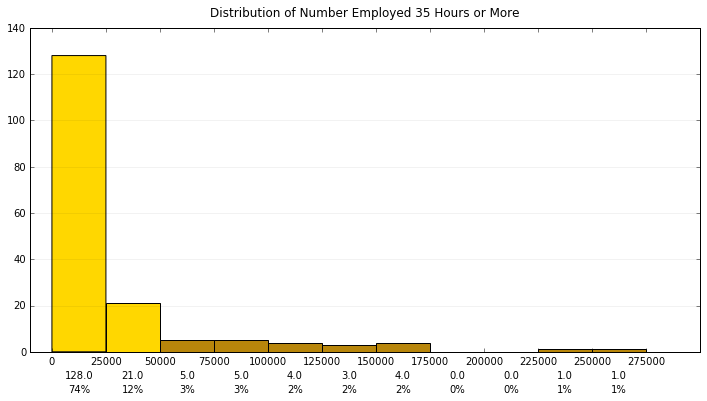

In [386]:
histog(recent_grads["Full_time"], figsize = (12, 6), 
       bins = np.arange(0, 300000, 25000), getQuartiles = True,
       getPercentages = True, color = "gold", setticks = True, 
       color25 = "goldenrod", color75 = "darkgoldenrod",
       xlim = -10000, title = "Distribution of Number Employed 35 Hours or More")

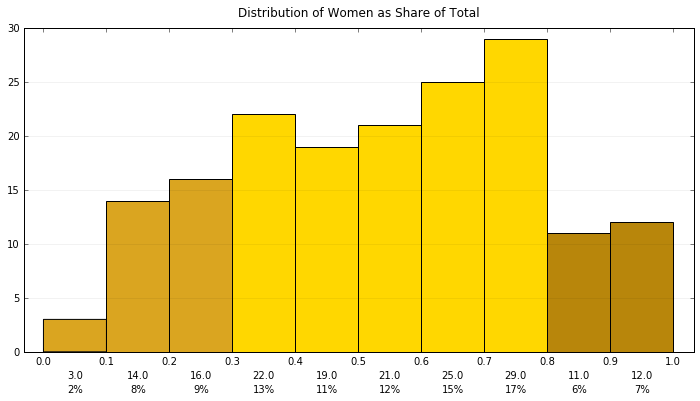

In [387]:
histog(recent_grads["ShareWomen"], figsize = (12, 6), getQuartiles = True,
       getPercentages = True, color = "gold", setticks = True, 
       color25 = "goldenrod", color75 = "darkgoldenrod",
       withDecimal = True, xlim = -.030, 
       title = "Distribution of Women as Share of Total")

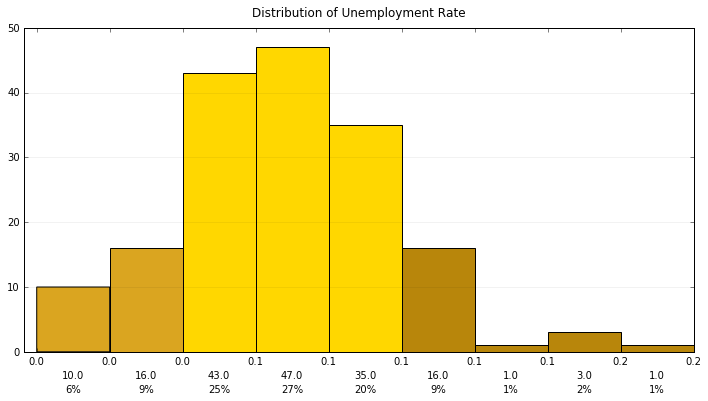

In [388]:
histog(recent_grads["Unemployment_rate"], figsize = (12, 6), 
       bins = np.arange(0, 0.2, 0.020),
       getQuartiles = True,
       getPercentages = True, color = "gold", setticks = True, 
       color25 = "goldenrod", color75 = "darkgoldenrod",
       withDecimal = True, xlim = -.0035, 
       title = "Distribution of Unemployment Rate")

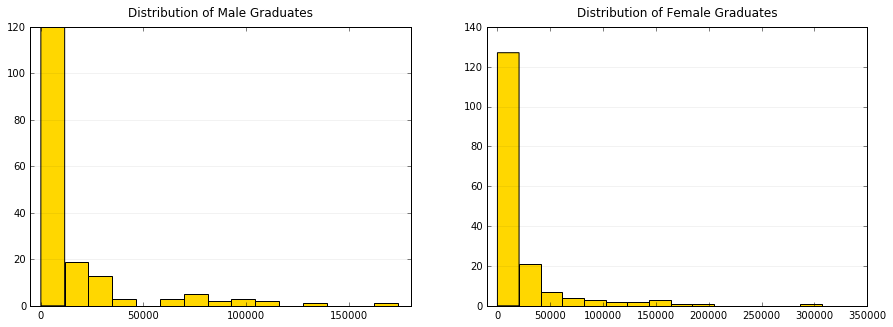

In [19]:
fig = plt.figure(figsize = (15, 5))

ax = fig.add_subplot(1, 2 ,1)
ax2 = fig.add_subplot(1, 2, 2)

ax.hist(recent_grads["Men"], bins = 15, color = "gold")
ax.set_title("Distribution of Male Graduates", y = 1.02)
ax.set_xlim(-5000)
ax.grid(True, alpha = 0.1, axis = "y", ls = "-")

ax2.hist(recent_grads["Women"], bins = 15, color = "gold")
ax2.set_title("Distribution of Female Graduates", y = 1.02)
ax2.set_xlim(-10000)
ax2.grid(True, alpha = 0.1, axis = "y", ls = "-")
plt.show()

## Combination of Both

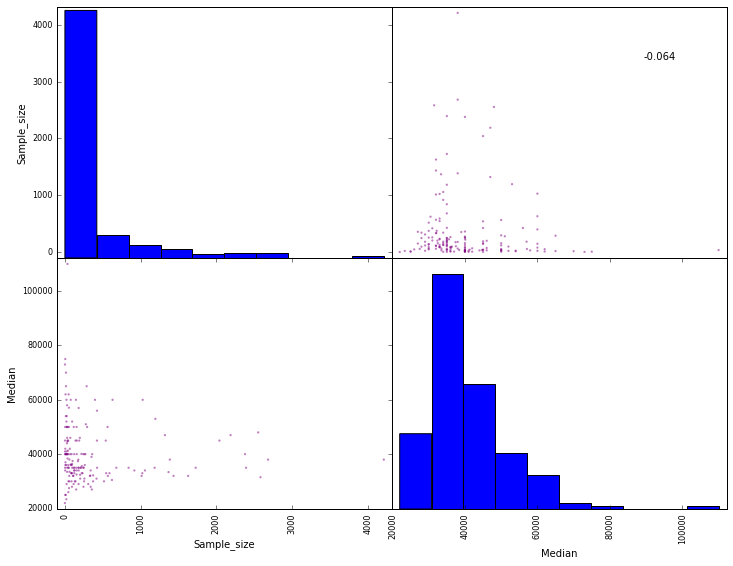

In [404]:
from pandas.plotting import scatter_matrix

#scatter_matrix(recent_grads[["Sample_size", "Median"]], alpha = 0.5,
 #              figsize = (12,9), grid = True, color = "purple")

df = recent_grads[["Sample_size", "Median"]]

axes = scatter_matrix(df, alpha = 0.5, diagonal='kde', 
                      figsize = (12,9), grid = True, color = "purple", linewidth = 5)
corr = df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16e9cbb860>,
      dtype=object)

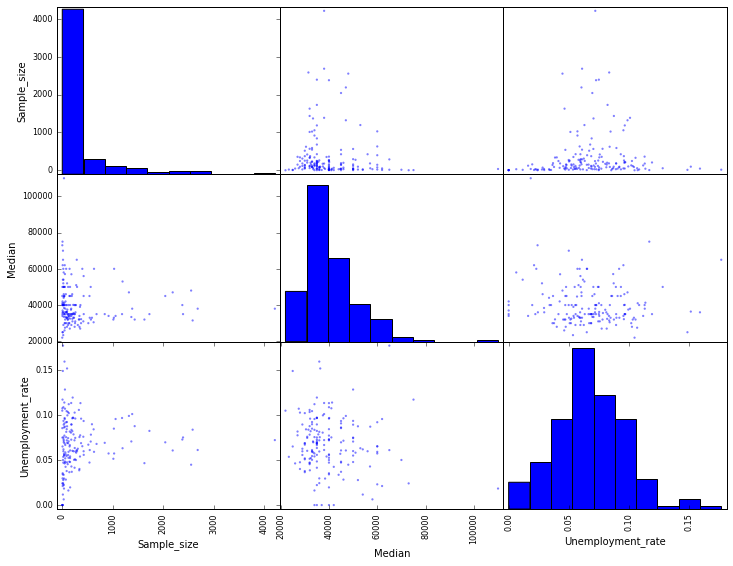

In [411]:
cmap = mp.cm.get_cmap('viridis')

scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], 
               alpha = 0.5, figsize = (12,9), grid = True, cmap = cmap)

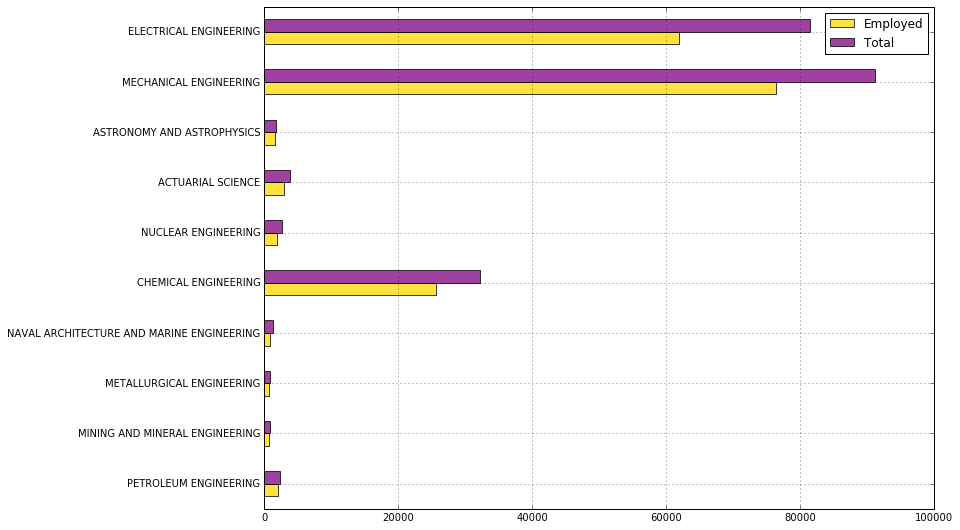

In [352]:
y1 = recent_grads[0:10]["Total"].tolist()
y2 = recent_grads[0:10]["Employed"].tolist()
index = recent_grads[0:10]["Major"].tolist()
df = pd.DataFrame({'Total': y1, 'Employed': y2}, index = index)
ax = df.plot.barh(color = ("gold", "purple"), grid = True, 
                  alpha = 0.75, figsize = (12, 9))

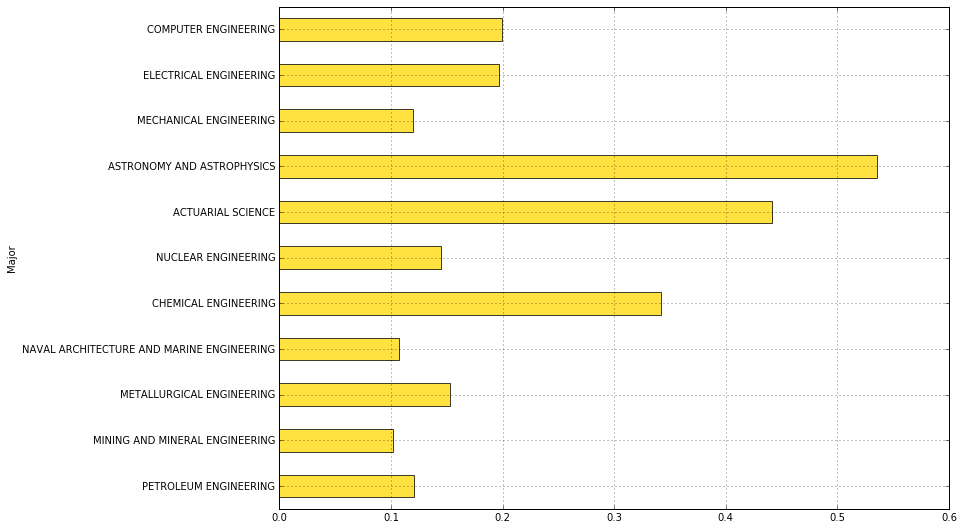

In [350]:
recent_grads.loc[:10].plot.barh(x = "Major", y = "ShareWomen",
                                color = "gold", grid = True, legend = False, 
                                alpha = 0.75, figsize = (12, 9),
                                 = True)

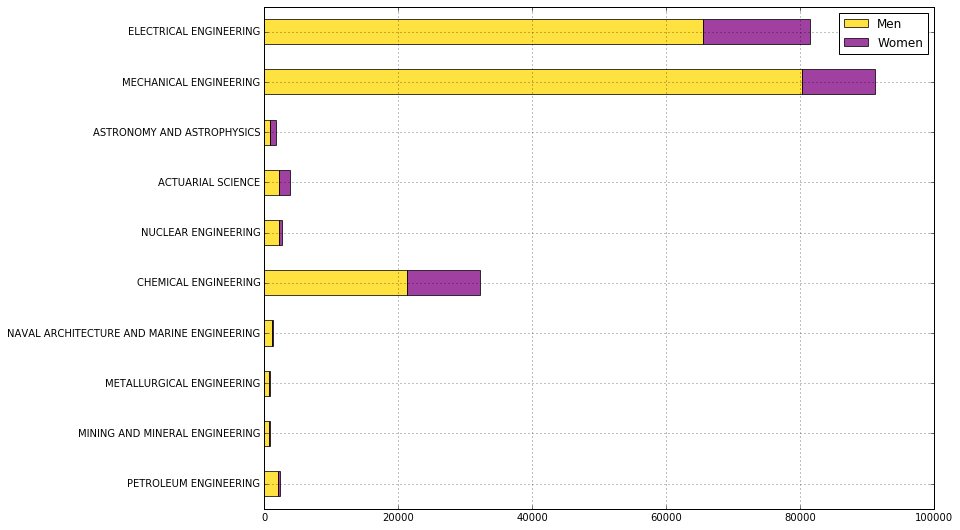

In [361]:
y1 = recent_grads[0:10]["Men"].tolist()
y2 = recent_grads[0:10]["Women"].tolist()
index = recent_grads[0:10]["Major"].tolist()
df = pd.DataFrame({'Men': y1, 'Women': y2}, index = index)
ax = df.plot.barh(color = ("gold", "purple"), grid = True, 
                  alpha = 0.75, figsize = (12, 9), stacked = True)